# CRQ1

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

CRQ1 was performed over premier league

In [40]:
df = pd.read_json('events_England.json')

### Cleaning data

Informetion about goals is stored in de column 'tags', the element stored them are lists of dictionaries. In order to performe our analisy we break the list and than we break the dictionary.

In [41]:
df

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609
5,8,Pass,12.548934,177959177,2499719,1H,3319,"[{'y': 88, 'x': 72}, {'y': 75, 'x': 77}]",85,Simple pass,[{'id': 1802}],1609
6,8,Pass,13.961228,177959186,2499719,1H,8653,"[{'y': 25, 'x': 23}, {'y': 15, 'x': 39}]",82,Head pass,[{'id': 1801}],1631
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
9,8,Pass,15.320341,177959178,2499719,1H,167145,"[{'y': 80, 'x': 67}, {'y': 61, 'x': 59}]",82,Head pass,"[{'id': 1401}, {'id': 1801}]",1609


In [42]:
df = pd.concat([df,pd.DataFrame(list(df['tags']))],axis = 1).drop('tags',axis = 1)  # breack the lists inside a tags column

df = df.rename(columns = {0: 'tag0', 1: 'tag1', 2: 'tag2', 3: 'tag3', 4: 'tag4', 5: 'tag5'}) #rename the new columns

#information about goals is stored in column 'tag0', so i remove the columns 'tag1' and above
for value in df.columns[12:]:       
    df = df.drop(value, axis = 1)

# Now some elements are setted as None, i replace it with the value 0 than i drop thata row
df = df.replace([None], 0)   # replacement
df = df[(df.tag0 != 0)]   # drop row
df = df.reset_index(drop = True)

# te elements of column 'tag0' are dictionarie {'id': tag_value}. break it mean create a new column named 'id'.
# There is already a column called 'id', where are stored unique value that identify the events. 
# We change its name to 'unicEventId'
df = df.rename(columns = {'id': 'unicEventId' }) 

df = pd.concat([df, pd.DataFrame(list(df.tag0))], axis = 1).drop('tag0', axis = 1) # breack the dictionaries

In [43]:
df

,eventId,eventName,eventSec,unicEventId,matchId,matchPeriod,playerId,positions,subEventId,subEventName,teamId,id
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,1609,1801
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,1609,1801
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,1609,1801
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,1609,1801
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,1609,1801
5,8,Pass,12.548934,177959177,2499719,1H,3319,"[{'y': 88, 'x': 72}, {'y': 75, 'x': 77}]",85,Simple pass,1609,1802
6,8,Pass,13.961228,177959186,2499719,1H,8653,"[{'y': 25, 'x': 23}, {'y': 15, 'x': 39}]",82,Head pass,1631,1801
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,1631,701
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,1609,703
9,8,Pass,15.320341,177959178,2499719,1H,167145,"[{'y': 80, 'x': 67}, {'y': 61, 'x': 59}]",82,Head pass,1609,1401


### barplot with the absolute frequency of goals in all the time slots.

Now we can select all the goal events, they are cassifide with 'id' = 101. Every goals is stored doubles in the dataframe, becouse of a single goal event is seen by point of view of the goal keeper and the attaker. If the goal keeper performe a save attempt  and fail it,  its a goal. This event is stored with 'id' = 101 and 'eventId' = 9

In [44]:
# we create two data frame, one for the first half and another for the second half.
# H1_Goals stored all the goal during the first half of the match, cleaned from the doubles. Similary for H2_Goals

H1_Goals = df[(df.id == 101) & (df.eventId != 9) & (df.matchPeriod == '1H')] 
H2_Goals = df[(df.id == 101) & (df.eventId != 9) & (df.matchPeriod == '2H')]

H1 = []  # will be stored all goals performed in each intervals
for i in range(5):
    # count the goals performed in each interval
    H1.append(len(H1_Goals[(H1_Goals.eventSec >= i*540) & (H1_Goals.eventSec < (i+1)*540)])) 
    
H1.append(len(H1_Goals[H1_Goals.eventSec >= 2700])) # count the goal performed during the stoppage time


H2 = [] # similary to H1
for i in range(5):
    # count the goals performed in each interval
    H2.append(len(H2_Goals[(H2_Goals.eventSec >= i*540) & (H2_Goals.eventSec < (i+1)*540)])) 
    
H2.append(len(H2_Goals[H2_Goals.eventSec >= 2700])) # count the goal performed during the stoppage time

we make a double bar plot in order to compare the Goals performed during each half time

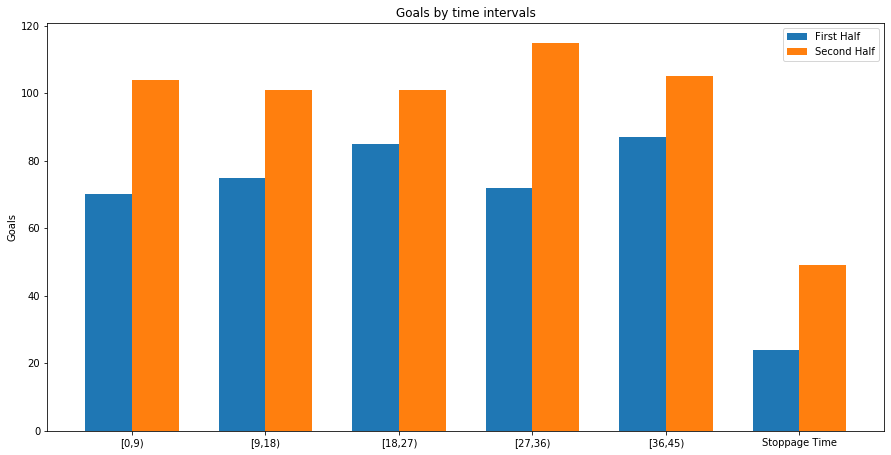

In [46]:
# The plot
labels = ['[0,9)', '[9,18)', '[18,27)', '[27,36)', '[36,45)', 'Stoppage Time']
w = 0.35

plot = plt.subplot()
fig =plt.gcf()
fig.set_size_inches(15, 7.5)
plot1 = plot.bar(np.arange(len(labels)) - w/2 , H1, w, label = 'First Half')
plot2 = plot.bar(np.arange(len(labels)) + w/2 , H2, w, label = 'Second Half')

plot.set_ylabel('Goals')
plot.set_title('Goals by time intervals')
plot.set_xticks(np.arange(len(labels)))
plot.set_xticklabels(labels)
plot.legend()

### Find the top 10 teams that score the most in the interval "81-90"

In order to finde the top 10 team who score the mosts in the interva [81-90], we select all the goals that fall in this amount of  time from 'H2_Goals', and we store it in a new data frame called 'interva'. After calculate the ammount of goal performed by a team we stor it and the team id in a new dataframe called 'scores'.

In [47]:
interval = H2_Goals[(H2_Goals['eventSec'] >= 60*36) & (H2_Goals['eventSec'] <= 60*45)]

scores = pd.DataFrame() # will be store the team id and the number of goals performed
Teams = pd.read_json('../teams.json')

for value in set(interval.teamId):
    team = list(Teams[Teams.wyId == value].name)[0]
    # we store the team id, the team name, and its score 
    scores = pd.concat([scores, pd.DataFrame([[value, team, len(interval[interval.teamId == value])]])], axis = 0)
    
scores = scores.rename(columns = {0: 'teamId', 1: 'Team', 2 : 'Goals'}) 
scores = scores.sort_values(['Goals'], ascending= False) # we organize the team in descending order
scores = scores.reset_index(drop = True)

In [48]:
scores[:10] # we print the top 10 teams that score the most in the interval "81-90"

,teamId,Team,Goals
0,1625,Manchester City,13
1,1609,Arsenal,11
2,1610,Chelsea,9
3,1611,Manchester United,9
4,1612,Liverpool,7
5,1644,Watford,7
6,1628,Crystal Palace,7
7,1633,West Ham United,6
8,1624,Tottenham Hotspur,5
9,1659,AFC Bournemouth,5


### Show if there are players that were able to score at least one goal in 8 different intervals

We collect the id of the players who performed goals in a set. We scroll throu the set and for each player whe caount in how many intervals he performed a goal, if the number of intervals is eight or above we score the value and the player id in a dataframe called Players  

In [49]:
Players = pd.DataFrame() # will be stored the player 

all_Team = set(df[(df.id == 101) & (df.eventId != 9)].playerId) # are stored the id of the player who performed a goal
all_Players = pd.read_json('../players.json')

for value in all_Team:
    
    Ser1 = H1_Goals[H1_Goals.playerId == value] # the goal performed by a player during the first half
    Ser2 = H2_Goals[H2_Goals.playerId == value] # the goal performed by a player during the second half
    
    count = 0 # counter of the number of intervals of time in wich goals are performend by the player
     
    for i in range(5):
        if any(i*60 <= Ser1.eventSec) & any(Ser1.eventSec < (i +  1)*60): # check the first half
            count += 1
        if any(i*60 <= Ser2.eventSec) & any(Ser2.eventSec < (i +  1)*60): # check the second half
            count += 1
    if any(Ser1.eventSec > 45*60): # check the first half (stoppage time)
        count += 1
    if any(Ser2.eventSec > 45*60): # check the second half (stoppage time)
        count += 1
    if count >= 8: 
        player_name = list(all_Players[all_Players.wyId == value].shortName)[0] 
        Players = pd.concat([Players, pd.DataFrame([[value, player_name, count]])], axis = 0) #store the player id and its name
                            
Players = Players.rename(columns = {0 : 'playerId', 1 : 'shortName', 2: 'Goals'})
Players = Players.sort_values('Goals', ascending = False)
Players = Players.reset_index(drop = True)

In [50]:
Players  # we print players that were able to score at least one goal in 8 different intervals

,playerId,shortName,Goals
0,54,C. Eriksen,11
1,3324,\u00c1lvaro Morata,9
2,8717,H. Kane,8
3,14763,S. Okazaki,8
